# Telco Churn Classification Project In R

**By David Ku**

December 20, 2019

This is the same notebook as this one in my [Github repository](https://github.com/dk81/insurancedata_clusteringProject)

In [1]:
# Load in libraries:

library(ggplot2)
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v dplyr   0.8.1
v readr   1.3.1     v stringr 1.4.0
v tibble  2.1.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# 1) Load Data and Basic Exploratory Data Analysis (EDA):

In [2]:
# Load .csv (Remember to set working directory of where the .csv file is):

insurance_data <- read.csv('insurance_customers.csv', header = TRUE)

# Check head of data:
head(insurance_data)

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,...,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
1,BU79786,Washington,2764,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.8111,Two-Door Car,Medsize
2,QZ44356,Arizona,6980,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.4649,Four-Door Car,Medsize
3,AI49188,Nevada,12887,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.4722,Two-Door Car,Medsize
4,WW63253,California,7646,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.8813,SUV,Medsize
5,HB64268,Washington,2814,No,Basic,Bachelor,2002-03-11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.1309,Four-Door Car,Medsize
6,OC83172,Oregon,8256,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.3830,Two-Door Car,Medsize


In [3]:
# Check dimensions of data:

dim(insurance_data)

[1] 9134   24

In [4]:
# Check data type for each variable with str():

str(insurance_data)

'data.frame':	9134 obs. of  24 variables:
 $ Customer                     : Factor w/ 9134 levels "AA10041","AA11235",..: 601 5947 97 8017 2489 4948 8434 756 1352 548 ...
 $ State                        : Factor w/ 5 levels "Arizona","California",..: 5 1 3 2 5 4 4 1 4 4 ...
 $ Customer_Lifetime_Value      : int  2764 6980 12887 7646 2814 8256 5381 7216 24128 7388 ...
 $ Response                     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ Coverage                     : Factor w/ 3 levels "Basic","Extended",..: 1 2 3 1 1 1 1 3 1 2 ...
 $ Education                    : Factor w/ 5 levels "Bachelor","College",..: 1 1 1 1 1 1 2 5 1 2 ...
 $ Effective_To_Date            : Factor w/ 59 levels "1/13/11","1/14/11",..: 31 19 26 8 50 13 31 6 14 24 ...
 $ EmploymentStatus             : Factor w/ 5 levels "Disabled","Employed",..: 2 5 2 5 2 2 2 5 3 2 ...
 $ Gender                       : Factor w/ 2 levels "F","M": 1 1 1 2 2 1 1 2 2 1 ...
 $ Income                       : int  5

In [5]:
# Remove Customer column full of Customer IDs:

insurance_data$Customer <- NULL

In [6]:
# Check data type for each variable with str():

str(insurance_data)

'data.frame':	9134 obs. of  23 variables:
 $ State                        : Factor w/ 5 levels "Arizona","California",..: 5 1 3 2 5 4 4 1 4 4 ...
 $ Customer_Lifetime_Value      : int  2764 6980 12887 7646 2814 8256 5381 7216 24128 7388 ...
 $ Response                     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ Coverage                     : Factor w/ 3 levels "Basic","Extended",..: 1 2 3 1 1 1 1 3 1 2 ...
 $ Education                    : Factor w/ 5 levels "Bachelor","College",..: 1 1 1 1 1 1 2 5 1 2 ...
 $ Effective_To_Date            : Factor w/ 59 levels "1/13/11","1/14/11",..: 31 19 26 8 50 13 31 6 14 24 ...
 $ EmploymentStatus             : Factor w/ 5 levels "Disabled","Employed",..: 2 5 2 5 2 2 2 5 3 2 ...
 $ Gender                       : Factor w/ 2 levels "F","M": 1 1 1 2 2 1 1 2 2 1 ...
 $ Income                       : int  56274 0 48767 0 43836 62902 55350 0 14072 28812 ...
 $ Location_Code                : Factor w/ 3 levels "Rural","Suburban",..: 2 

In [7]:
# Check for any NULL:

sum(is.na(insurance_data))

[1] 0

## Pairplots

For exploratory data analysis a pairplot can be used to have an initial look of the relationships between numerical variables. Pairplots in R can be done with `ggpairs()` from the `GGally` R package.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'GGally'


The following object is masked from 'package:dplyr':

    nasa




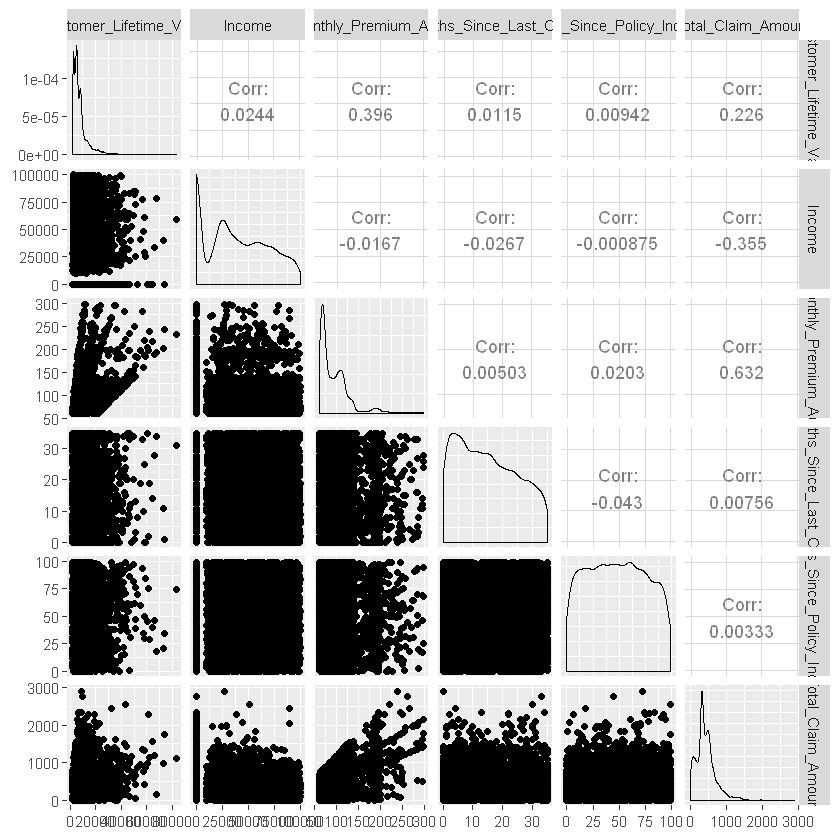

In [8]:
# Pairplots

library(GGally)

# Obtain numerical columns except for number of open complaints and 
# number of policies:

numerical_cols <- c('Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto', 
                    'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
                    'Total_Claim_Amount')

# Pairplots (does take time):
ggpairs(insurance_data, columns = numerical_cols)

**Column Names In Pairplot**

The column names are hard to read. I did not have the columns become visisble. From top left to right, the columns are:

* Customer_Lifetime_Value
* Income
* Monthly_Auto_Premium
* Months_Since_Last_Claim
* Months_Since_Policy_Inception
* Total_Claim_Amount

**Observations**

* Income seems to have little correlation on Total_Claim_Amount
* Low positive correlation from Customer Lifetime Value To Total Claim Amount
* Higher Monthly Premium auto payments leads to higher total claim amounts. But a large chunk are less than 150 / mth and less than 1200 for total claim amount.


# 2) Principal Component Analysis (PCA) On Insurance Data

Principal component analysis (PCA) can be used to look at which features / variables contribute to each principal component (and to a target variable).

Note that a principal component is a line (linear combination) of all the variables.


In [10]:
# Perform PCA

pca_data <- prcomp(insurance_data[c(numerical_cols, 'Number_of_Open_Complaints',
                                    'Number_of_Policies')], scale. = T, center = T)

In [11]:
# Matrix of variable loadings
pca_data$rotation 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Customer_Lifetime_Value,0.415829953,-0.46977104,0.14780911,-0.007218458,-0.017382640,0.039782572,-0.751237475,0.135123757
Income,-0.242604066,-0.78229186,0.14941174,-0.116633185,0.052791379,0.006749629,0.440413788,0.310545903
Monthly_Premium_Auto,0.615246649,-0.22494485,0.02403167,-0.082745611,0.025279995,-0.020153928,0.367509359,-0.653711428
Months_Since_Last_Claim,0.019734549,0.18301396,0.62769568,-0.081589016,0.269759509,0.699874912,0.052957921,0.007627372
Months_Since_Policy_Inception,0.019468631,-0.12852722,-0.65618929,-0.016068698,-0.228361906,0.707006502,0.007439923,0.014015558
Total_Claim_Amount,0.622561120,0.23553396,-0.06425241,-0.013358649,-0.003623756,-0.052040897,0.303807964,0.676471665
Number_of_Open_Complaints,-0.036614585,0.10480608,0.01822595,-0.961469572,-0.233382173,-0.059630968,-0.069759810,0.005441719
Number_of_Policies,0.002970401,0.01614065,0.35525241,0.219044734,-0.903809777,0.044926770,0.081174000,-0.008126616


In [12]:
# Standard deviations of principal components
pca_data$sdev 

[1] 1.3839992 1.0593522 1.0227447 0.9996354 0.9977594 0.9779689 0.8328451
[8] 0.5210215

In [13]:
# Proportions for each principal components
pca_data$sdev / sum(pca_data$sdev)

[1] 0.17754217 0.13589580 0.13119973 0.12823522 0.12799457 0.12545580 0.10683903
[8] 0.06683768

In [16]:
### Making a scree plot:

scree_data <- data.frame('PC' = 1:8, 'Proportion' = pca_data$sdev / sum(pca_data$sdev))


scree_data['Total_Var'] = cumsum(scree_data$Proportion)

scree_data

PC,Proportion,Total_Var
<int>,<dbl>,<dbl>
1,0.17754217,0.1775422
2,0.13589580,0.3134380
3,0.13119973,0.4446377
4,0.12823522,0.5728729
5,0.12799457,0.7008675
6,0.12545580,0.8263233
7,0.10683903,0.9331623
8,0.06683768,1.0000000


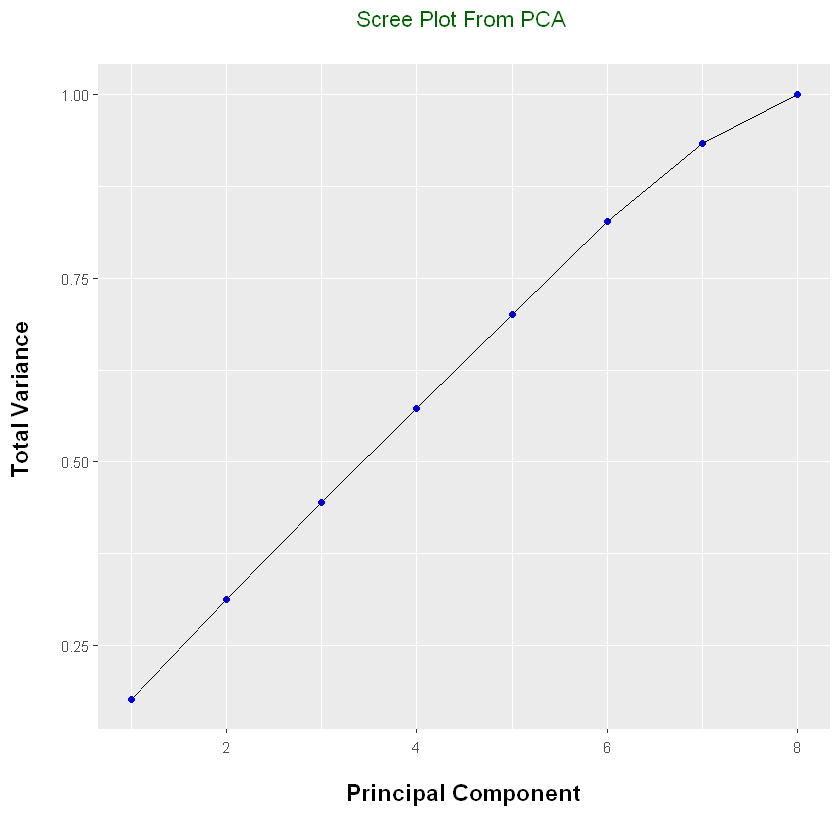

In [18]:
## Plot scree plot in ggplot2:

plot <- ggplot(scree_data, aes(x = PC, y = Total_Var)) 

plot + geom_point(color = 'blue') + geom_line() +
  labs(x = "\n Principal Component \n", y = "Total Variance \n", 
       title = "Scree Plot From PCA \n") + 
  theme(plot.title = element_text(hjust = 0.5, colour = "darkgreen"), 
        axis.title.x = element_text(face="bold", size = 14),
        axis.title.y = element_text(face="bold", size = 14),
        axis.text.x = element_text(vjust = 0.2),
        legend.title = element_text(face="bold", size = 20)) 

In [19]:
# Go for 7 PCs it seems.

# Look at variable loadings again and then pick out top features

pca_rotations <- pca_data$rotation 

pca_rotations

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Customer_Lifetime_Value,0.415829953,-0.46977104,0.14780911,-0.007218458,-0.017382640,0.039782572,-0.751237475,0.135123757
Income,-0.242604066,-0.78229186,0.14941174,-0.116633185,0.052791379,0.006749629,0.440413788,0.310545903
Monthly_Premium_Auto,0.615246649,-0.22494485,0.02403167,-0.082745611,0.025279995,-0.020153928,0.367509359,-0.653711428
Months_Since_Last_Claim,0.019734549,0.18301396,0.62769568,-0.081589016,0.269759509,0.699874912,0.052957921,0.007627372
Months_Since_Policy_Inception,0.019468631,-0.12852722,-0.65618929,-0.016068698,-0.228361906,0.707006502,0.007439923,0.014015558
Total_Claim_Amount,0.622561120,0.23553396,-0.06425241,-0.013358649,-0.003623756,-0.052040897,0.303807964,0.676471665
Number_of_Open_Complaints,-0.036614585,0.10480608,0.01822595,-0.961469572,-0.233382173,-0.059630968,-0.069759810,0.005441719
Number_of_Policies,0.002970401,0.01614065,0.35525241,0.219044734,-0.903809777,0.044926770,0.081174000,-0.008126616


**Some Insights From PCA**

* In the first principal component (PC1), Monthly Premium Auto, Total Claim Amount and then Customer Lifetime Value (CLV) are the top three variables.
* In PC2 it's Income, CLV, Monthly Premium Auto.
* In PC3, top variables are Months_Since_Last_Claim, Months_Since_Policy_Inception

## Scatterplot Between Income Vs Monthly Premium Auto

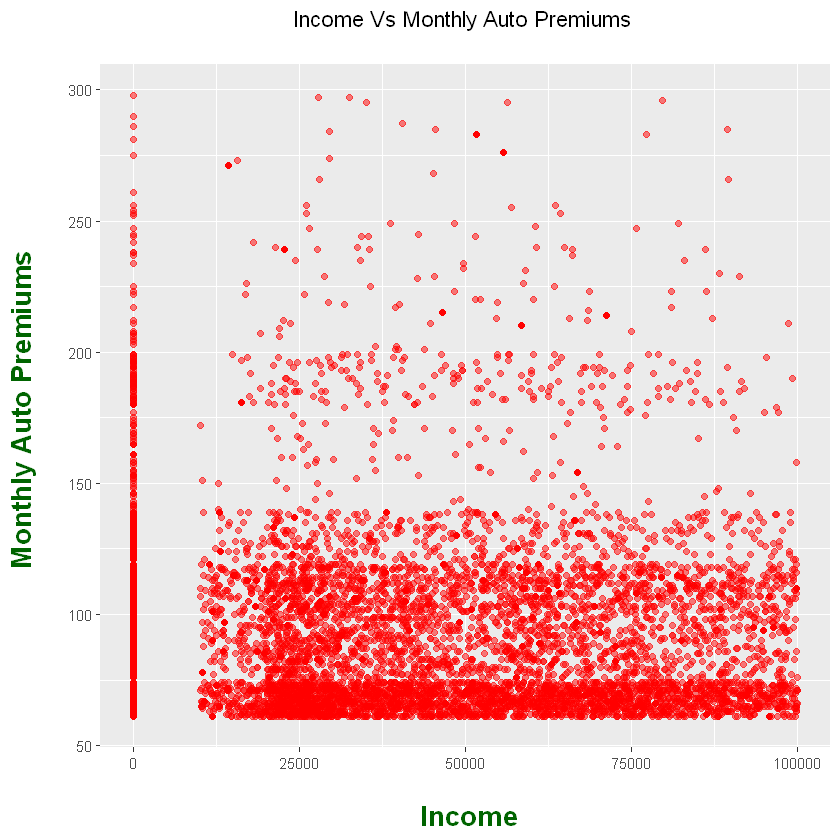

In [25]:
# From the Python findings, Income and Monthly Auto Premiums is one pair to look at.
# Scatterplot Between Income and Monthly Premiums:

ggplot(insurance_data, aes(x = Income, y = Monthly_Premium_Auto)) +
  geom_point(color = 'red', alpha = 0.5)+
  labs(x = "\n Income", y = "Monthly Auto Premiums \n", 
       title = "Income Vs Monthly Auto Premiums \n") + 
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour = "darkgreen", size = 16),
        axis.title.y = element_text(face="bold", colour = "darkgreen", size = 16),
        legend.title = element_text(face="bold", size = 24))

Note the unemployed part of the scatterplot where Income = 0. It is best not to upsell to this group as they have no money (presumably).


In [27]:
# Number of unemployed

num_unemp <- sum(insurance_data$Income == 0)

num_unemp

# Insurance data without unemployed:

insurance_data2 <- insurance_data[insurance_data$Income != 0, ]

insurance_data2 

dim(insurance_data2)

# Check that dimensions are correct. 
# That is num rows in original data - num_unemp = num rows in insurance_data2

(dim(insurance_data)[1] - num_unemp) == dim(insurance_data2)[1]

[1] 2317

,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,...,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
1,Washington,2764,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81115,Two-Door Car,Medsize
3,Nevada,12887,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47225,Two-Door Car,Medsize
5,Washington,2814,No,Basic,Bachelor,2002-03-11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13088,Four-Door Car,Medsize
6,Oregon,8256,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.38304,Two-Door Car,Medsize
7,Oregon,5381,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.60000,Four-Door Car,Medsize
9,Oregon,24128,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.20000,Four-Door Car,Medsize
10,Oregon,7388,No,Extended,College,2/17/11,Employed,F,28812,Urban,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.52783,Four-Door Car,Medsize
13,California,8799,No,Premium,Master,2002-06-11,Employed,M,77026,Urban,...,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.02974,Four-Door Car,Medsize
14,Arizona,8819,Yes,Basic,High School or Below,2001-10-11,Employed,M,99845,Suburban,...,25,1,8,Corporate Auto,Corporate L3,Offer2,Branch,528.00000,SUV,Medsize


[1] 6817   23

[1] TRUE

In [28]:
# Insurance data without unemployed:

insurance_data2 <- insurance_data[insurance_data$Income != 0, ]

insurance_data2 

,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,...,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
1,Washington,2764,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81115,Two-Door Car,Medsize
3,Nevada,12887,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47225,Two-Door Car,Medsize
5,Washington,2814,No,Basic,Bachelor,2002-03-11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13088,Four-Door Car,Medsize
6,Oregon,8256,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.38304,Two-Door Car,Medsize
7,Oregon,5381,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.60000,Four-Door Car,Medsize
9,Oregon,24128,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.20000,Four-Door Car,Medsize
10,Oregon,7388,No,Extended,College,2/17/11,Employed,F,28812,Urban,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.52783,Four-Door Car,Medsize
13,California,8799,No,Premium,Master,2002-06-11,Employed,M,77026,Urban,...,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.02974,Four-Door Car,Medsize
14,Arizona,8819,Yes,Basic,High School or Below,2001-10-11,Employed,M,99845,Suburban,...,25,1,8,Corporate Auto,Corporate L3,Offer2,Branch,528.00000,SUV,Medsize


In [29]:
dim(insurance_data2)

[1] 6817   23

In [30]:
# Check that dimensions are correct. 
# That is num rows in original data - num_unemp = num rows in insurance_data2

(dim(insurance_data)[1] - num_unemp) == dim(insurance_data2)[1]

[1] TRUE

# 3) K-Means Clustering - Finding "Optimal" k Clusters

In the Python code version I explored DBSCAN, Gaussian Mixture Models and K-Means. In this R code here I just do K-Means Clustering.

**Producing A Scree Plot**

In [31]:
# Producing A Scree Plot For Determining Optimal k Clusters in K-Means:
# Income Vs Monthly Premiums

total_within_sumsq <- rep(NA, 8) #Initialize

for (k in 1:8){
  insur_kmeans <- kmeans(insurance_data2[c('Income', 'Monthly_Premium_Auto')], 
                         centers = k)
  
  # Scree Plot: use total within cluster sum of squares
  
  total_within_sumsq[k] <- insur_kmeans$tot.withinss 
}

total_within_sumsq

[1] 4.026761e+12 9.960645e+11 4.563780e+11 2.631053e+11 1.695605e+11
[6] 1.243785e+11 9.160532e+10 6.938479e+10

In [32]:
## ggplot2 Version Of Scree Plot:

# Create table

scree_table <- data.frame(cbind(1:8, total_within_sumsq))

scree_table 

V1,total_within_sumsq
<dbl>,<dbl>
1,4.026761e+12
2,9.960645e+11
3,4.563780e+11
4,2.631053e+11
5,1.695605e+11
6,1.243785e+11
7,9.160532e+10
8,6.938479e+10


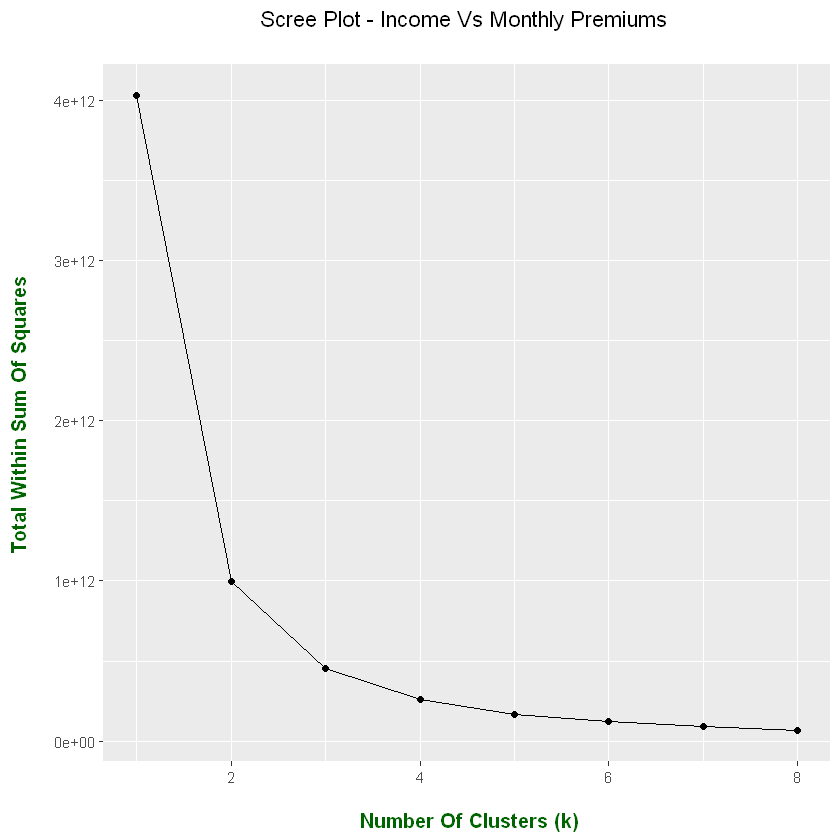

In [33]:
# Change column names:

colnames(scree_table) <- c("k", "TWSS")

# Scree ggplot plot:
ggplot(scree_table, aes(x = k, y = TWSS)) + geom_point() + geom_line() +
  labs(x = "\n Number Of Clusters (k)", y = "Total Within Sum Of Squares \n", 
       title = "Scree Plot - Income Vs Monthly Premiums \n") + 
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour = "darkgreen", size = 12),
        axis.title.y = element_text(face="bold", colour = "darkgreen", size = 12),
        legend.title = element_text(face="bold", size = 10))



Choose 3 clusters which is the elbow of the scree plot

# 4) Plots With Labelled Clusters

In [34]:
kmeans_model <- kmeans(insurance_data2[c('Income', 'Monthly_Premium_Auto')],
                       centers = 3)

# Total Sum Of Squares:

kmeans_model$totss

[1] 4.026761e+12

In [35]:
# Cluster centres (Cluster 1, 2, 3)

kmeans_model$centers

,Income,Monthly_Premium_Auto
1,55267.58,94.92186
2,83295.34,91.07466
3,26861.35,92.66195


In [36]:
# Size for each cluster / Number Of Points in each cluster

kmeans_model$size

[1] 2150 1768 2899

In [37]:
# Cluster labels:

kmeans_model$cluster

1    3    5    6    7    9   10   13   14   15   16   17   18   19   20   21 
   1    1    1    1    1    3    3    2    2    2    3    3    3    1    1    1 
  22   23   25   26   28   29   30   31   32   34   35   36   37   38   40   42 
   3    3    3    2    3    2    2    3    1    1    3    1    1    1    1    1 
  43   44   45   46   48   51   52   53   54   55   56   57   59   60   61   62 
   1    1    2    3    3    3    3    3    3    3    1    1    3    3    3    3 
  64   66   67   68   70   71   72   73   75   76   77   78   79   80   82   83 
   1    3    3    1    3    2    1    3    2    3    2    3    3    1    1    3 
  84   85   86   87   88   89   90   91   92   93   94   96   97   98   99  100 
   1    3    3    3    1    3    3    3    2    2    1    2    3    3    1    3 
 103  104  106  107  109  110  111  112  113  114  115  117  118  119  120  122 
   1    1    1    3    3    2    1    3    3    1    1    3    3    2    2    1 
 123  124  125  126  127  128  129  131  132  133  134  137  139  140  142  144 
   2    3    3    1    1    3    3    3    1    3    2    2    2    1    1    1 
 146  148  149  151  152  153  154  155  156  157  158  159  160  162  164  166 
   1    3    2    3    2    3    3    2    3    1    3    3    1    2    3    3 
 169  171  172  173  175  176  177  178  180  182  183  184  186  187  188  189 
   2    3    3    3    1    3    1    2    3    3    3    1    2    2    1    1 
 190  191  193  194  196  197  198  200  201  202  203  207  208  209  210  211 
   1    2    1    2    3    1    1    3    3    3    1    1    3    2    1    2 
 212  213  214  215  216  217  218  220  221  222  223  224  225  226  228  229 
   3    2    2    2    2    3    3    2    2    2    1    3    3    3    1    3 
 230  232  233  236  237  238  240  241  242  244  246  247  250  251  252  253 
   3    1    1    2    1    1    1    1    1    1    3    2    1    3    1    3 
 254  255  256  257  258  259  260  262  263  264  265  266  267  268  269  271 
   3    1    3    2    3    3    2    3    3    2    3    3    3    2    2    3 
 273  275  276  277  278  280  283  284  285  286  287  290  291  292  293  295 
   1    3    3    3    2    3    1    3    1    2    2    2    2    2    3    3 
 296  297  299  301  302  303  304  308  309  310  311  312  313  314  315  317 
   2    1    1    3    2    3    3    1    1    3    3    1    2    2    3    2 
 318  319  320  321  322  325  328  329  330  333  335  337  338  340  342  345 
   1    1    3    1    1    3    3    3    3    3    1    1    3    1    1    2 
 347  348  349  350  351  352  354  356  357  359  360  364  365  366  367  368 
   3    3    1    3    3    2    2    1    1    2    2    3    3    1    1    3 
 369  370  371  373  374  375  376  377  378  379  380  381  382  383  384  385 
   3    1    3    3    3    1    1    3    1    3    3    2    2    1    1    2 
 386  387  388  389  390  391  392  395  396  397  398  399  400  401  402  405 
   1    3    3    3    2    1    2    1    1    1    3    1    3    1    3    3 
 406  407  409  411  412  413  415  417  419  420  422  424  426  427  428  429 
   1    3    3    2    2    2    3    3    3    2    1    2    2    1    3    3 
 430  432  433  434  435  437  438  439  441  445  446  448  450  451  452  454 
   1    3    1    3    1    3    3    1    3    1    3    3    1    3    3    1 
 455  456  458  459  460  461  462  464  465  466  467  469  470  471  472  476 
   1    3    3    3    3    3    3    1    3    1    2    1    1    1    3    2 
 478  479  481  482  483  484  485  487  489  490  491  492  493  495  496  497 
   3    1    2    1    1    3    3    1    3    3    1    1    3    1    2    1 
 499  500  501  504  505  506  507  508  509  510  511  512  513  517  518  520 
   3    2    2    1    1    3    2    3    3    3    3    3    2    3    1    1 
 521  522  526  527  528  529  530  531  533  535  536  537  540  541  542  543 
   2    1    3    3    2    3    3

In [38]:
### Plotting clusters with labels:

# Create new copy on second insurance data (without unemployed)

insur_cluster <- insurance_data2

# Add star_km3 cluster component as new column to star_km3:

insur_cluster$clusterType <- as.factor(kmeans_model$cluster)

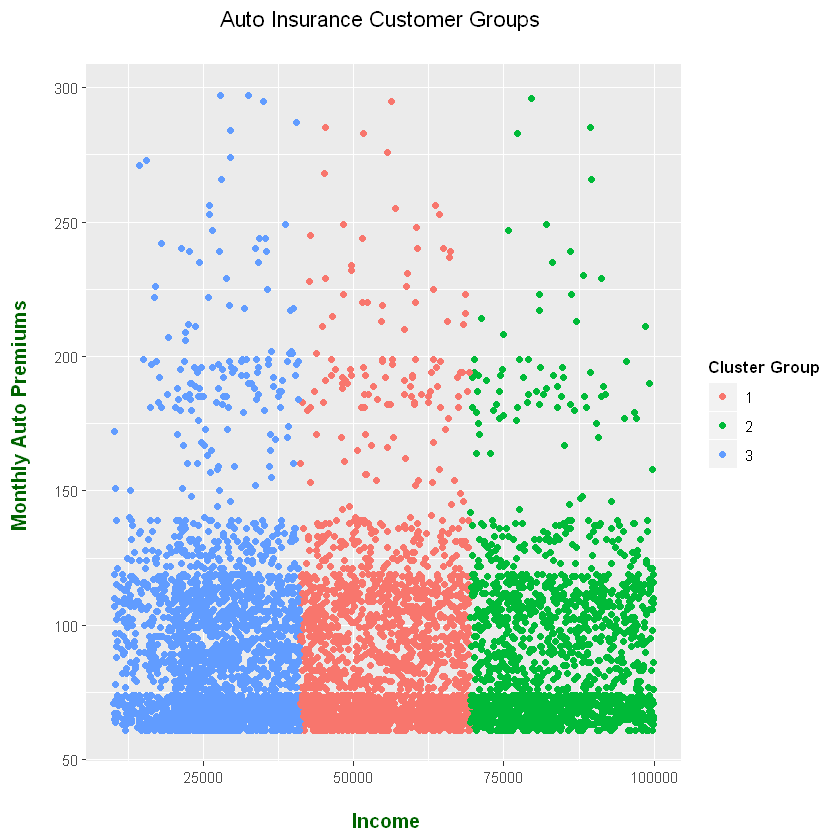

In [39]:
# Plot with Clusters Indicated By Colours:

ggplot(insur_cluster, aes(x = Income, y = Monthly_Premium_Auto, color = clusterType)) + 
  geom_point() + 
  labs(x = "\n Income", y = "Monthly Auto Premiums \n", 
       title = "Auto Insurance Customer Groups \n",
       colour = "Cluster Group") + 
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour = "darkgreen", size = 12),
        axis.title.y = element_text(face="bold", colour = "darkgreen", size = 12),
        legend.title = element_text(face="bold", size = 10))

The clusters are clustered by Income groups. This result is different
than the one from the Python code findings.

The green cluster (cluster 2) is the largest income group but many of them are paying
less than 150 / month on premiums. Can try to upsell to some in this cluster as they have
more money.


## Investigating The High Income Group

In [42]:
high_income_group <- insur_cluster[insur_cluster$clusterType == 2, ]

high_income_group

,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,...,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,clusterType
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,...,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
13,California,8799,No,Premium,Master,2002-06-11,Employed,M,77026,Urban,...,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.02974,Four-Door Car,Medsize,2
14,Arizona,8819,Yes,Basic,High School or Below,2001-10-11,Employed,M,99845,Suburban,...,1,8,Corporate Auto,Corporate L3,Offer2,Branch,528.00000,SUV,Medsize,2
15,California,5384,No,Basic,College,1/18/11,Employed,M,83689,Urban,...,2,8,Corporate Auto,Corporate L3,Offer4,Call Center,307.13913,Four-Door Car,Medsize,2
26,Oregon,5802,No,Basic,College,1/29/11,Employed,M,97541,Suburban,...,0,3,Personal Auto,Personal L3,Offer2,Call Center,389.18501,Four-Door Car,Large,2
29,Arizona,12903,No,Premium,College,2002-02-11,Employed,F,86584,Suburban,...,2,2,Personal Auto,Personal L3,Offer1,Call Center,532.80000,Four-Door Car,Large,2
30,Oregon,3235,No,Extended,Master,2002-07-11,Employed,F,75690,Suburban,...,1,1,Personal Auto,Personal L3,Offer2,Branch,384.00000,Four-Door Car,Small,2
45,Washington,2444,No,Basic,College,2/23/11,Employed,M,92834,Suburban,...,0,1,Special Auto,Special L2,Offer2,Call Center,292.80000,Four-Door Car,Large,2
71,Oregon,22644,No,Basic,High School or Below,2/24/11,Employed,M,93011,Rural,...,0,2,Personal Auto,Personal L3,Offer4,Agent,281.45104,SUV,Medsize,2
75,Oregon,4975,Yes,Basic,Bachelor,1/18/11,Employed,M,75644,Suburban,...,3,9,Personal Auto,Personal L3,Offer2,Branch,467.80364,Two-Door Car,Medsize,2


**Monthly Premiums Above 150**

In [43]:
# Check those above 150 monthly auto premiums:
# Using dplyr functions:

# Counts For each vehicle class, monthly premiums at least 150:

high_income_group %>%
  filter(Monthly_Premium_Auto >= 150) %>%
  group_by(Vehicle_Class) %>%
  summarise(count = n())

Vehicle_Class,count
<fct>,<int>
Luxury Car,29
Luxury SUV,25
Sports Car,5
SUV,17


In [44]:
# Average Income By Vehicle Class, monthly premiums at least 150:

high_income_group %>%
  filter(Monthly_Premium_Auto >= 150) %>%
  group_by(Vehicle_Class) %>%
  summarise(avg = mean(Income))

Vehicle_Class,avg
<fct>,<dbl>
Luxury Car,79682.86
Luxury SUV,82884.76
Sports Car,78681.60
SUV,81894.41


**Monthly Premiums Below 150**

In [46]:
# Counts For each vehicle class, monthly premiums below 150:

high_income_group %>%
  filter(Monthly_Premium_Auto < 150) %>%
  group_by(Vehicle_Class) %>%
  summarise(count = n())

Vehicle_Class,count
<fct>,<int>
Four-Door Car,884
Sports Car,71
SUV,324
Two-Door Car,413


In [47]:
# Average income by vehicle class, monthly premiums below 150

high_income_group %>%
  filter(Monthly_Premium_Auto < 150) %>%
  group_by(Vehicle_Class) %>%
  summarise(avg = mean(Income))

Vehicle_Class,avg
<fct>,<dbl>
Four-Door Car,83354.33
Sports Car,85447.04
SUV,83312.46
Two-Door Car,83177.78


From high income group, thosewith luxury vehicles are paying above 150/mth
Could try to upsell to sports car and SUV owners who are paying less than 150 / mth, try to upsell to them to the above 150 /mth part of the cluster.